# K Nearest Neighbors Project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

## the Data


In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.


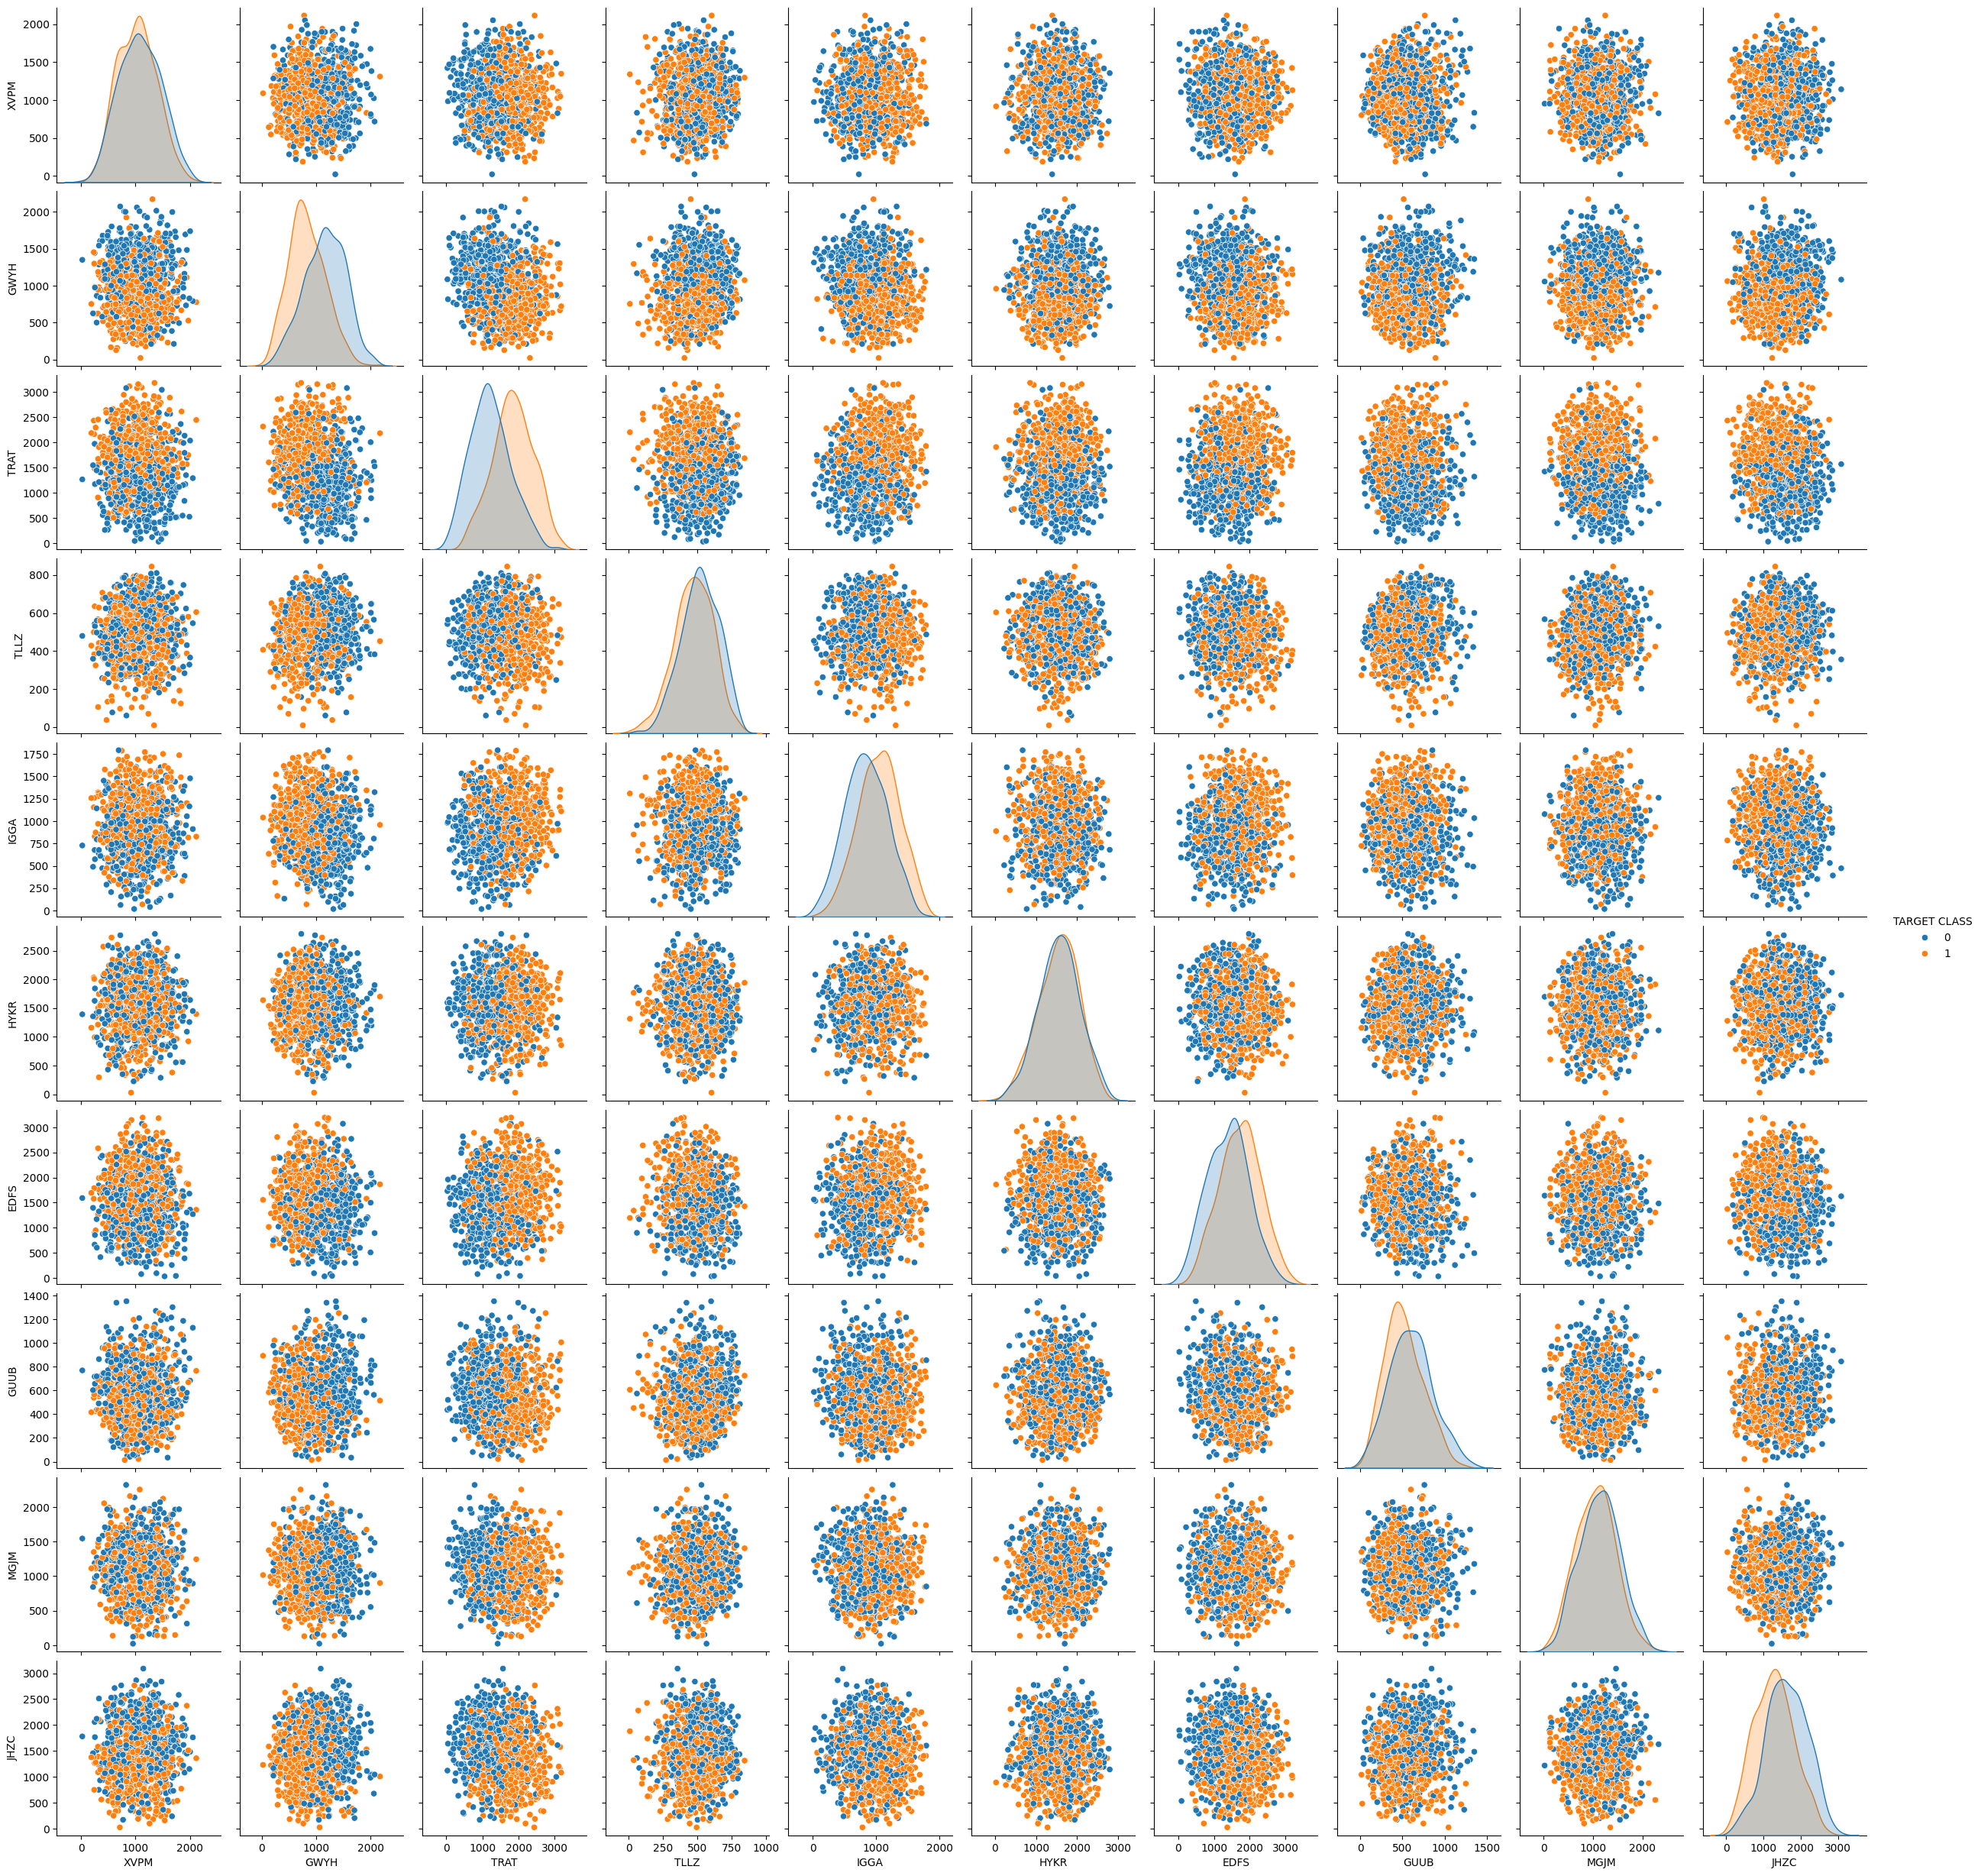

In [4]:
sns.pairplot(df,hue='TARGET CLASS')

# Standardize the Variables


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
ss = StandardScaler()

In [9]:
X = ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [13]:
df.columns[:-1]

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [15]:
X = pd.DataFrame(X,columns=df.columns[:-1])

In [16]:
X

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0    1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1   -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2    0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3    0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4   -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.776682  0.758234 -1.753322  0.507699  0.174588 -1.279354 -1.797957   
996 -0.313446  0.385206  0.885502 -0.083136 -1.208486  0.309242  0.746346   
997 -0.358895 -0.979015  0.837715  0.014018 -1.397424  0.054473  0.164120   
998  0.275080 -0.992399  0.030371  1.062954  1.142871 -0.192872  2.051386   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   

         GUUB      MGJM      JHZC  
0   -0.932794  1.008313 -1.069627  
1   -0.461864  0.258321 -1.041546  
2    1.149298  2.184784  0.342811  
3   -0.888557  0.162310 -0.002793  
4    0.391419 -1.365603  0.787762  
..        ...       ...       ...  
995  0.431419  0.088717  1.188886  
996 -0.112571 -1.763636 -1.559081  
997 -1.514726 -0.275122  0.864287  
998 -0.036233  0.436685 -0.212456  
999 -1.251565 -0.603529 -0.879859  

[1000 rows x 10 columns]

In [18]:
y = df['TARGET CLASS']

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)

# Using KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
kk = KNeighborsClassifier(n_neighbors=1)

In [105]:
kk.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [106]:
perdi = kk.predict(X_test)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
confusion_matrix(y_test,perdi)

array([[115,  47],
       [ 48, 120]], dtype=int64)

In [109]:
print(classification_report(y_test,perdi))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



# Choosing a K Value

In [120]:
error_rate = []

for i in range(1,45):
    ks = KNeighborsClassifier(n_neighbors=i)
    ks.fit(X_train,y_train)
    
    pre = ks.predict(X_test)
    error_rate.append(np.mean(y_test != pre))

**Now create the following plot using the information from your for loop.**

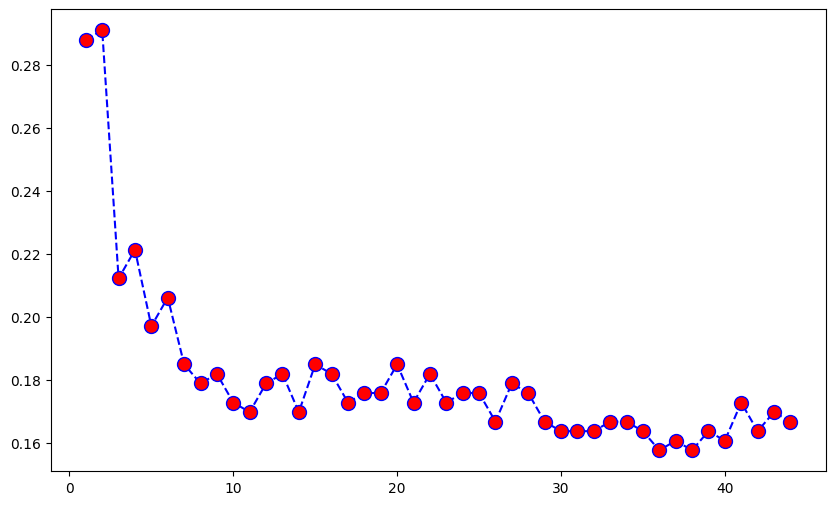

In [121]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [122]:
er = pd.DataFrame(score_rate)

## Retrain with new K Value

In [124]:
ks = KNeighborsClassifier(n_neighbors=35)
ks.fit(X_train,y_train)
    
pres = ks.predict(X_test)

In [125]:
ks.score(X_test,y_test)

0.8363636363636363

In [126]:
confusion_matrix(y_test,pres)

array([[133,  29],
       [ 25, 143]], dtype=int64)

In [127]:
print(classification_report(y_test,pres))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       162
           1       0.83      0.85      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



# Great Job!